<a href="https://colab.research.google.com/github/asmaaalaa99/C146--Modern-Computational-Statistics/blob/master/CS166_Pre_class_12_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import scipy.stats as sts 
import numpy as np 
import matplotlib.pyplot as plt
def f(x):
    Z = 24.44321494051954 
    if abs(x) > 7:
        return 0 
    elif abs(x) > 3:
        return 3 * (1 - (x / 7) ** 2) ** 0.5 / Z 
    elif abs(x) > 1:
        return ((3 - abs(x)) / 2 -
                3/7 * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5 - 2)
                )/Z
    elif abs(x) > 0.75:
        return (9 - 8 * abs(x)) / Z 
    elif abs(x) > 0.5:
        return (3 * abs(x) + 0.75) / Z
    else:
        return 2.25 / Z

    
def M_H(x0, step):
    samples = np.empty(step + 1)
    samples[0] = x0

    for t in range(step):
        proposal = sts.norm(loc = samples[t], scale=2).rvs(size = 1)
        acceptance = (
            f(proposal) / f(samples[t]) *
            sts.norm(loc = samples[t], scale=2).pdf(proposal) / 
            sts.norm(loc = proposal, scale=2).pdf(samples[t]))
        if sts.binom.rvs(1, min(1, acceptance)):
            samples[t+1] = proposal
        else:
            samples[t+1] = samples[t]

    samples = samples[1:]  # Remove the initial value
    return samples


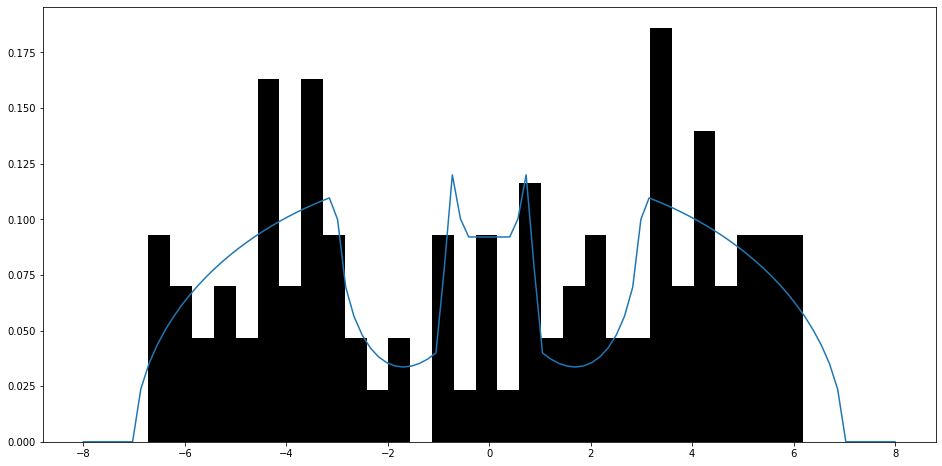

In [8]:
x = np.linspace(-8,8,100)
y = [f(i) for i in x]
samples = M_H(0, 10000)

plt.figure(figsize=(16,8))
plt.plot(x,y)
plt.hist(samples[::100], bins=30, density=True, color = 'black')
plt.show()
